# What can be learned?

The metaphysical question of what can be learned is not typically considered in our daily lives, as we often focus on the more practical question of how something can be learned. However, when transferring human learning achievements, understanding, and comprehension to a machine, we must consider not only how a machine could learn this information but also whether it is possible for the machine to learn it at all.

As cultural beings, our perception of any circumstance is inevitably influenced by its implicit cultural framework. Frameworks such as critical theory aim to uncover how these implicit structures shape our understanding. For example, when discussing transportation, we already have subjective associations and relations with the topic.

This concept also applies to music, as illustrated by the differing perceptions of tuning systems across various cultures. To approximate such sensory sensitivity in a machine learning model, we must use mathematical formalism. The fundamental idea of machine learning is that this sensitivity and information are embedded within data, and patterns can be detected and extracted.

A machine learning algorithm is essentially a mathematical function with numerous variables that maps an input to an output, a result. One might assume that it is always necessary to provide pairs of inputs and outputs to identify a structure. However, it is often sufficient to present enough data for the algorithm to discern patterns.

This can be demonstrated by comparing images of hand-drawn digits, such as the numbers 3 and 8, from the MNIST dataset.

```{figure} assets/mnist_3.png

Some examples of a handwritten $3$ of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).
```

```{figure} assets/mnist_8.png

Some examples of a handwritten $8$ of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).
```



One interesting way to create `term`{embeddings} is [word2vec](https://www.tensorflow.org/text/tutorials/word2vec), which has a 


Within this document, the question is how the relation of neural network topology implies also its capabilities to *learn* tasks of different *complexity*.

Models such as the formalization of randomness through probability theory and ... have not just provided new paths within their respective field, but also.

At the same time, although everything has been shaped and conceived through mental processes, these processes have not seen a full comprehension yet, but their powerful model has been applied to domains of computation as well.

In this document we want to inspect some basic capabilities of *artificial* neural networks.

Most likely this is also closely attached to the question, what can be computed?

Interestingly enough, the ideas of how a brain can be represented is always strongly dependent upon the history.
In history, there have been models of the brain which work around the concept of a pneumatic model.

Starting with the rise of computers, they have been used to model the functions of a brain.

In [ ]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torchvision.datasets import MNIST

%config InlineBackend.figure_format = 'svg'

mnist = MNIST(root=Path.cwd().joinpath("..", "data", "mnist"), download=True)

idx_3 = np.where(mnist.targets == 3)
idx_8 = np.where(mnist.targets == 8)

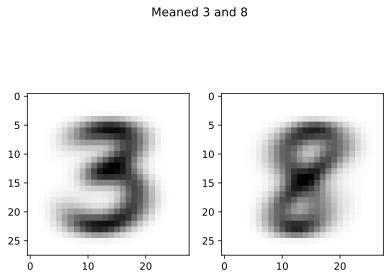

In [ ]:
fig, (ax_1, ax_2) = plt.subplots(1, 2)
plt.suptitle("Meaned 3 and 8")

ax_1.imshow(mnist.data[idx_3].numpy().mean(axis=0), cmap="gray_r")
ax_2.imshow(mnist.data[idx_8].numpy().mean(axis=0), cmap="gray_r");

Although meaning a series may be famillar action to represent many examples into one,

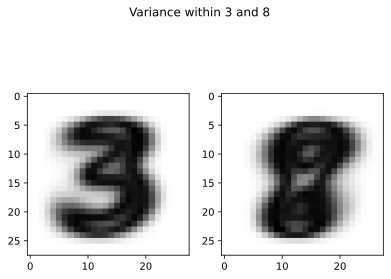

In [ ]:
fig, (ax_1, ax_2) = plt.subplots(1, 2)
plt.suptitle("Variance within 3 and 8")

ax_1.imshow(mnist.data[idx_3].numpy().var(axis=0), cmap="gray_r")
ax_2.imshow(mnist.data[idx_8].numpy().var(axis=0), cmap="gray_r");

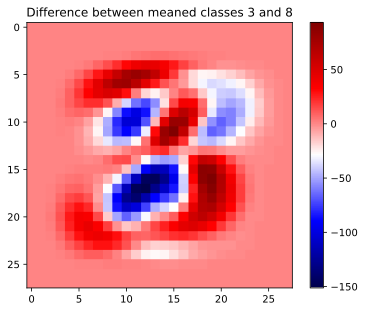

In [ ]:
plt.title("Difference between meaned classes 3 and 8")

mean_3 = mnist.data[idx_3].numpy().mean(axis=0)
mean_8 = mnist.data[idx_8].numpy().mean(axis=0)

plt.imshow(mean_3 - mean_8, cmap="seismic")
plt.colorbar();

Just by taking a look at the difference between the meaned two classes we can spot  

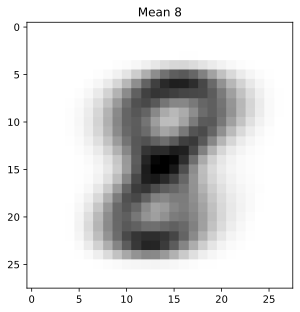

In [ ]:
plt.title("Mean 8")
plt.imshow(mnist.data[idx_8].numpy().mean(axis=0), cmap="gray_r");

In [ ]:
## variance

plt.title("Mean 8")
plt.imshow(mnist.data[idx_8].numpy().mean(axis=0), cmap="gray_r");

## Artificial neural networks



### McCulloch and Pitts model

In 1943 Warren McCulloch and Walter Pitts proposed a model of artificial neurons which cover tho {cite}`McCulloch1943`

These basic networks should provide us also a good exercise in order to obtain familiarity with constructing artifical neural networks.

In [ ]:
from typing import List

import numpy as np
import torch
from torch import nn

In [ ]:
class McCullochPitts:
    def __init__(self, weights: List[int], threshold: float) -> None:
        self.weights = np.array(weights)
        self.threshold = threshold

    def forward(self, x: List[int]) -> int:
        weight = np.inner(x, [self.weights])
        return (weight >= self.threshold).astype(np.int8)

In [ ]:
from itertools import product


def test_mcp(mcp: McCullochPitts, num_input_dims: int = 2):
    possible_values = [0, 1]
    permutations = np.array(list(product(possible_values, repeat=num_input_dims)))
    results = mcp.forward(permutations)
    for x, y in zip(permutations, results):
        print(f"{x} -> {y}")
    return permutations, results

In [ ]:
and_mcp = McCullochPitts(weights=[1, 1], threshold=2.0)

test_mcp(and_mcp);

[0 0] -> [0]
[0 1] -> [0]
[1 0] -> [0]
[1 1] -> [1]


In [ ]:
or_mcp = McCullochPitts(weights=[1, 1], threshold=1.0)

test_mcp(or_mcp);

[0 0] -> [0]
[0 1] -> [1]
[1 0] -> [1]
[1 1] -> [1]


In [ ]:
not_mcp = McCullochPitts(weights=[-1], threshold=0)

test_mcp(not_mcp, num_input_dims=1);

[0] -> [1]
[1] -> [0]


```{admonition} Task
1. Implement a NOT mcp cell. What must be the activation weights?
```

### Taylor and Fourier series

Another way to approximate an unknown function by its in- and output values is the use of Taylor or Fourier series.

Where Taylor series uses an infinite sum of powers to approximate a function, a fourier series uses an infinite sum of trigonometric (i.e. (co-)sine) functions.

```{admonition} ToDo
https://www.oranlooney.com/post/adaptive-basis-functions/
```

### Perceptron

In 1957, Frank Rosenblatt suggested an extension to the McCulloch pitts model called a *Perceptron*.
The model uses a number instead of binary on/off values as input $x$ of a neuron, and each of these inputs of a cell has an associated *weight* $w$.
The neuron calculates the weighted sum of its inputs ($z=w_1 x_1 + w_2 x_2 + \dots + w_n x_n = = x^T w$) which then is used as an input of a *step function*.

#### Multi layered perceptron

